In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/results/results.csv")

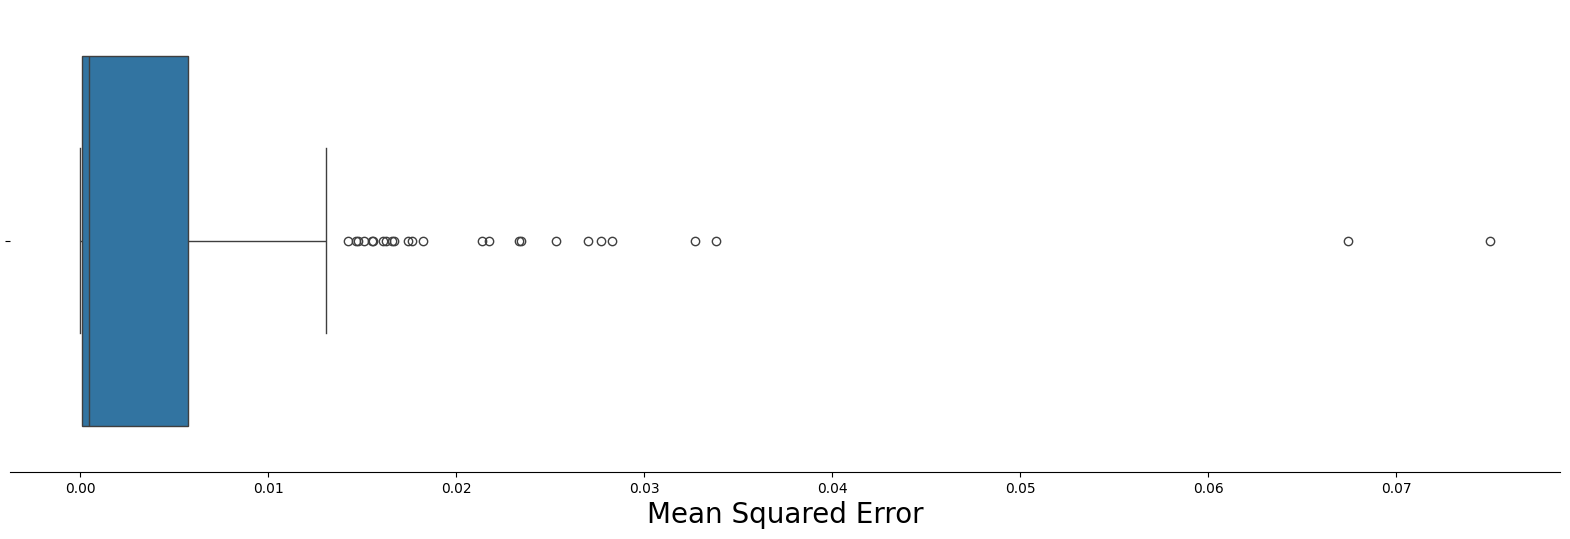

In [ ]:
plt.figure(figsize=(20, 6))

sns.boxplot(
    data["Erro MSE"],
    orient="h",
)

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)

plt.xlabel("Mean Squared Error", fontsize=20)
plt.show()

In [5]:
Q1 = data["Erro MSE"].quantile(0.25)
Q3 = data["Erro MSE"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data["Erro MSE"] >= lower_bound) & (data["Erro MSE"] <= upper_bound)]

In [6]:
filtered_data.shape

(245, 6)

In [78]:
norm_bottleneck = (filtered_data["Espaço Latente"] - filtered_data["Espaço Latente"].min()) / (filtered_data["Espaço Latente"].max() - filtered_data["Espaço Latente"].min())
norm_mse = (filtered_data["Erro MSE"] - filtered_data["Erro MSE"].min()) / (filtered_data["Erro MSE"].max() - filtered_data["Erro MSE"].min())

In [ ]:
filtered_data.loc[:, "Score"] = [0] * len(filtered_data)

best_config_1_df = filtered_data.assign(Score = 0.2 * norm_bottleneck + 0.8 * norm_mse).sort_values(by="Score", ascending=True)[["Configuração", "Espaço Latente"]].head(10)
best_config_2_df = filtered_data.assign(Score = 0.3 * norm_bottleneck + 0.7 * norm_mse).sort_values(by="Score", ascending=True)[["Configuração", "Espaço Latente"]].head(10)
best_config_3_df = filtered_data.assign(Score = 0.4 * norm_bottleneck + 0.6 * norm_mse).sort_values(by="Score", ascending=True)[["Configuração", "Espaço Latente"]].head(10)

best_config_1 = set([tuple(x) for x in best_config_1_df.values])
best_config_2 = set([tuple(x) for x in best_config_2_df.values])
best_config_3 = set([tuple(x) for x in best_config_3_df.values])

intersection = best_config_1.intersection(best_config_2).intersection(best_config_3)

intersection

{('feedforward_autoencoder_asymmetric_c3', 3.0),
 ('feedforward_autoencoder_asymmetric_c4', 3.0),
 ('feedforward_autoencoder_symmetric_c2', 3.0)}